## Linear Regression

In regression problems, we take input features and try to fit the output onto a continuous expected result function.

For e.g. : Predicting the house price on the basis of house features such as location of house, number of rooms, sq. ft. etc. 


In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(24)
%matplotlib inline

In [162]:
#let us take some sample data points

X = np.array([2,4,1,5,6,1,8,7,5,9,0,2,3,4], dtype=float)
y = np.array([3,2,0,4,9,2,12,7,4,12,0.5,1,3,6], dtype=float)
n = X.shape[0]

In [163]:
print X

[ 2.  4.  1.  5.  6.  1.  8.  7.  5.  9.  0.  2.  3.  4.]


In [164]:
print y

[  3.    2.    0.    4.    9.    2.   12.    7.    4.   12.    0.5   1.
   3.    6. ]


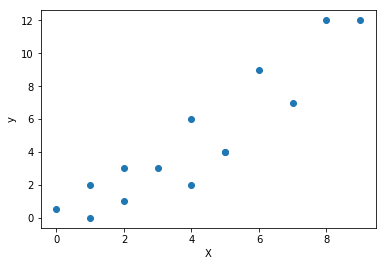

In [165]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Most basic Hypothesis Function

$$\widehat{y} = w_{0} + w_{1}x_{1}$$

$\widehat{y} = The\ output\ predicted\ by\ our\ model$

$w_{0}$
,
$w_{1}$
$= The\ coefficients\ of\ the\ features\ ,also\ known\ as\ weights.\ (We\ need\ to\ adjust\ the\ values\ of\ these\ coefficients)$

$x_{1} = The\ input\ feature\ value$



In [166]:
w_0 = np.random.rand()
w_1 = np.random.rand()

In [167]:
def prediction(w_0, w_1, X):
    y_hat_all = []

    for x_i in X:
        y_hat = w_0 + w_1*x_i
        y_hat_all.append(y_hat)
    return y_hat_all

In [168]:
y_hat = prediction(w_0, w_1, X)

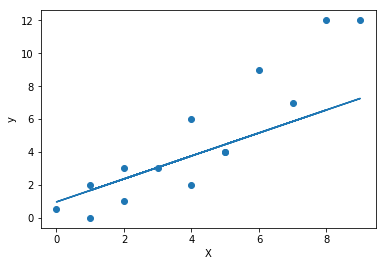

In [169]:
plt.scatter(X,y)
plt.plot(X,y_hat)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Cost Function

$$J(w_{0},w_{1}) = \frac{1}{n}\sum_{i=1}^{n}(\widehat{y_{i}}-y_{i})^{2}$$

$n = Number\ of\ data\ points$

$y_{i} = Actual\ output$

$w_{0}$
,
$w_{1}$
$= Weights$

$\widehat{y_{i}} = Predicted\ output$

In [170]:
def cost_function(y, y_hat, n):
    ret = 0.0
    for (y_i,y_hat_i) in zip(y, y_hat):
        ret = ret + (y_i - y_hat_i)**2
    ret = ret/n
    return ret

In [171]:
cost = cost_function(y, y_hat, n)

In [172]:
print cost

5.86421056909


In [173]:
X.shape

(14,)

In [174]:
X = X.reshape((n,1))
y = y.reshape((n,1))

In [175]:
print X.shape
print y.shape

(14, 1)
(14, 1)


In [176]:
X

array([[ 2.],
       [ 4.],
       [ 1.],
       [ 5.],
       [ 6.],
       [ 1.],
       [ 8.],
       [ 7.],
       [ 5.],
       [ 9.],
       [ 0.],
       [ 2.],
       [ 3.],
       [ 4.]])

In [177]:
ones = np.ones((14,1))

In [178]:
ones

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [179]:
X = np.hstack((ones,X))

In [180]:
X

array([[ 1.,  2.],
       [ 1.,  4.],
       [ 1.,  1.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  1.],
       [ 1.,  8.],
       [ 1.,  7.],
       [ 1.,  5.],
       [ 1.,  9.],
       [ 1.,  0.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.]])

In [181]:
W = np.random.randn(2,1)

In [182]:
W

array([[ 1.32921217],
       [-0.77003345]])

In [183]:
print X.shape
print W.shape

(14, 2)
(2, 1)


### General hypothesis function

$$\widehat{y} = w_{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} + ........ + w_{m}x_{m}$$

$\widehat{y} = The\ output\ predicted\ by\ our\ model$

$m = Number\ of\ features$

$w_{0}$
,
$w_{1}$
.....
$w_{m}$
$= The\ coefficients\ of\ the\ features\ ,also\ known\ as\ weights.\ (We\ need\ to\ adjust\ the\ values\ of\ these\ coefficients)$

$x_{1}$
,
$x_{2}$
.....
$x_{m}$
$= The\ input\ feature\ value$

$x_{0} = Bias\ term\ (Usually\ equal\ to\ 1)$


### General cost function

$$J(W) = \frac{1}{n}\sum_{i=1}^{n}(\widehat{y_{i}}-y_{i})^{2}$$

$n = Number\ of\ data\ points$

$y_{i} = Actual\ output$

$W = Weights\ vector$

$\widehat{y_{i}} = Predicted\ output$

In [184]:
def prediction(X,W):
    return np.dot(X,W)

In [185]:
y_hat = prediction(X,W)

In [186]:
print y_hat

[[-0.21085473]
 [-1.75092164]
 [ 0.55917872]
 [-2.52095509]
 [-3.29098854]
 [ 0.55917872]
 [-4.83105544]
 [-4.06102199]
 [-2.52095509]
 [-5.6010889 ]
 [ 1.32921217]
 [-0.21085473]
 [-0.98088818]
 [-1.75092164]]


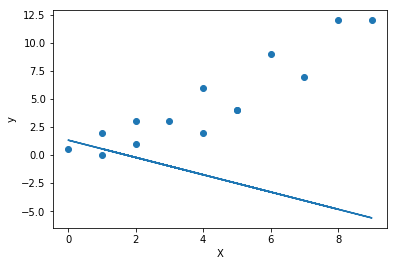

In [187]:
plt.scatter(X[:,1].ravel(),y.ravel())
plt.plot(X[:,1].ravel(),y_hat.ravel())
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [188]:
def cost_function(y,y_hat):
    return np.mean((y-y_hat)**2)

In [189]:
loss = cost_function(y, y_hat)

In [190]:
print cost

5.86421056909


### Optimization : Gradient Descent

$One\ step\ of\ Gradient\ Descent\ is\ :\ $

$For\ all\ weights\ j : $

$$w_{j} = w_{j} -  \alpha \frac{\partial }{\partial w_{j}} J(W)$$

$\alpha = Learning\ rate$

$\frac{\partial }{\partial w_{j}} J(W)\ \ \ = \ \ \ Partial\ derivative\ of\ loss\ function\ \ w.r.t\ \ w_{j} \ \ \ = \ \ \ \ \frac{2}{n}\sum_{i=1}^{n}(\widehat{y_{i}}-y_{i})x_{j}^{(i)}$ 

$\therefore For\ all\ weights\ j : $

$$w_{j} = w_{j} -  \alpha \frac{2}{n}\sum_{i=1}^{n}(\widehat{y_{i}}-y_{i})x_{j}^{(i)}$$

In [191]:
def gradient_descent(W, y_hat, y, X, alpha=0.01):
    W_new = np.array(W)
    for j in range(W.shape[0]):
        grad = 2*(np.sum( (y_hat - y).ravel() * X[:,j].ravel()))/n
        W_new[j,:] = W_new[j,:] - alpha*grad
    return W_new

In [192]:
gradient_descent(W,y_hat,y,X)

array([[ 1.45890208],
       [ 0.05441795]])

In [194]:
def gradient_descent(W, y_hat, y, X, alpha=0.01):
    W_new = W - alpha * (2.0/n) * np.dot(np.transpose(X),(y_hat - y))
    return W_new

In [195]:
gradient_descent(W,y_hat,y,X)

array([[ 1.45890208],
       [ 0.05441795]])

22.7603844643


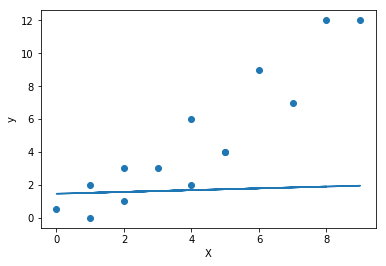

In [196]:
W = gradient_descent(W,y_hat,y,X)
y_hat = prediction(X,W)
cost = cost_function(y, y_hat)
print cost
plt.scatter(X[:,1].ravel(),y.ravel())
plt.plot(X[:,1].ravel(),y_hat.ravel())
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [197]:
def linear_regression(X, y, iterations=100, alpha=0.01, verbose=True, plot_descent=False, plot =True):
    n_samples = X.shape[0]
    n_features = X.shape[1]
    costs = []
    W = np.random.randn(n_features,1)
    W_1 = []
    if(verbose):
        print "Initial Weights :"
        print W
    for i in range(iterations):
        y_hat = np.dot(X,W)
        cost = np.mean((y-y_hat)**2)
        costs.append(cost)
        W_1.append(W[1,:])
        W = W - alpha * (2.0/n_samples) * np.dot(np.transpose(X),(y_hat - y))
    if(verbose):
        print "Final weights : "
        print W
        print "Final cost : ", costs[iterations-1]
    y_hat = np.dot(X,W)
    
    #ploting cost and resultant graphs 
    if(plot == True):
        if(not plot_descent):
            f, (ax1,ax2) = plt.subplots(1,2, figsize=(15,8))
            ax1.plot(range(iterations), costs)
            ax1.set_xlabel("Iterations")
            ax1.set_ylabel("Cost")
            if(n_features==2):
                ax2.scatter(X[:,1].ravel(),y.ravel())
                ax2.plot(X[:,1].ravel(),y_hat.ravel(), color='r')
                ax2.set_xlabel("X")
                ax2.set_ylabel("y")
            plt.show()
        else:
            f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,8))
            ax1.plot(range(iterations), costs)
            ax1.set_xlabel("Iterations")
            ax1.set_ylabel("Cost")
            if(n_features==2):
                ax2.scatter(X[:,1].ravel(),y.ravel())
                ax2.plot(X[:,1].ravel(),y_hat.ravel(), color='r')
                ax2.set_xlabel("X")
                ax2.set_ylabel("y")
                ax3.plot(W_1, costs)
                ax3.scatter(W_1, costs, color='r')
                ax3.set_ylabel("Cost ( J(W) )")
                ax3.set_xlabel("W1")
            plt.show()
    
    return W
    

Initial Weights :
[[-0.31628036]
 [-0.99081039]]
Final weights : 
[[-0.28463489]
 [ 1.25048821]]
Final cost :  2.37911427062


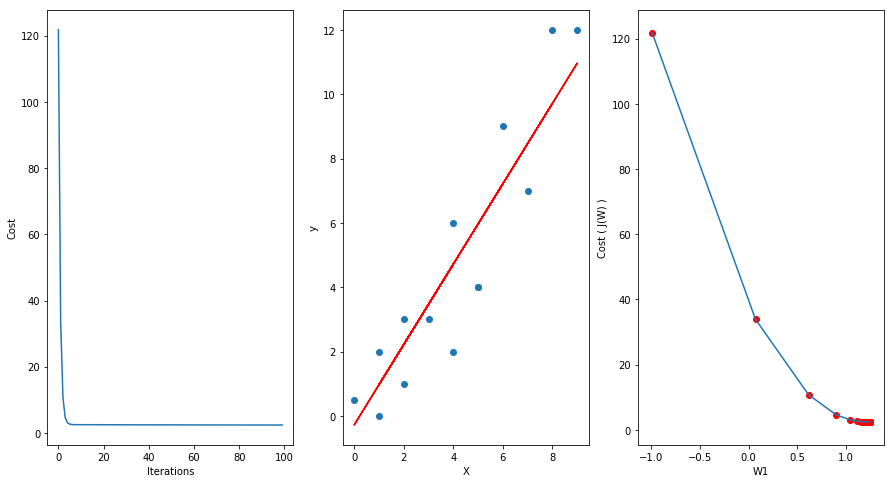

In [198]:
W = linear_regression(X, y, alpha=0.01, plot_descent=True)

In [225]:
n = 50
X = np.array(range(n))
X = X.reshape((n,1))
y = 2 * X**2

In [226]:
X = np.hstack((np.ones((n,1)), X))

Initial Weights :
[[ 0.12166836]
 [ 1.20760254]]
Final weights : 
[[ -1.70362022]
 [ 74.2864997 ]]
Final cost :  296260.649773


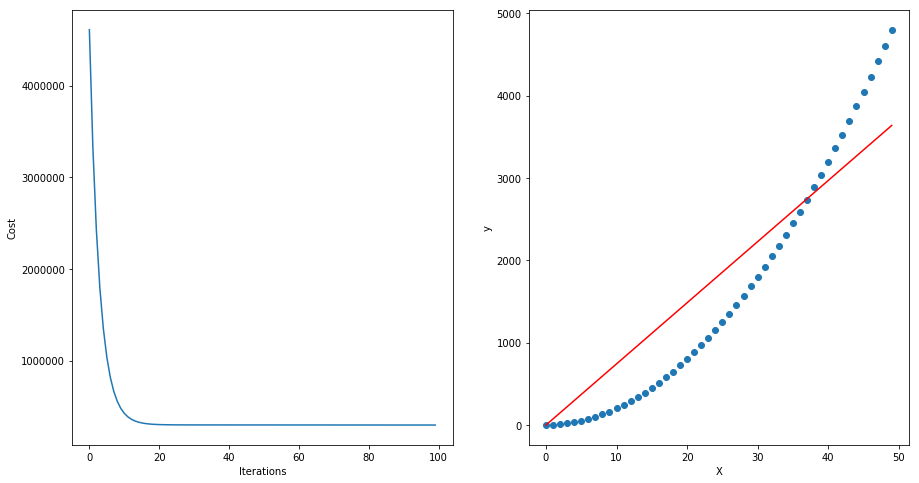

In [227]:
W = linear_regression(X, y, alpha=0.0001, iterations=100)

In [228]:
X[:,1] = X[:,1]**2

Initial Weights :
[[-0.38568351]
 [ 0.519818  ]]
Final weights : 
[[-0.38467281]
 [ 2.00026172]]
Final cost :  0.0665768642434


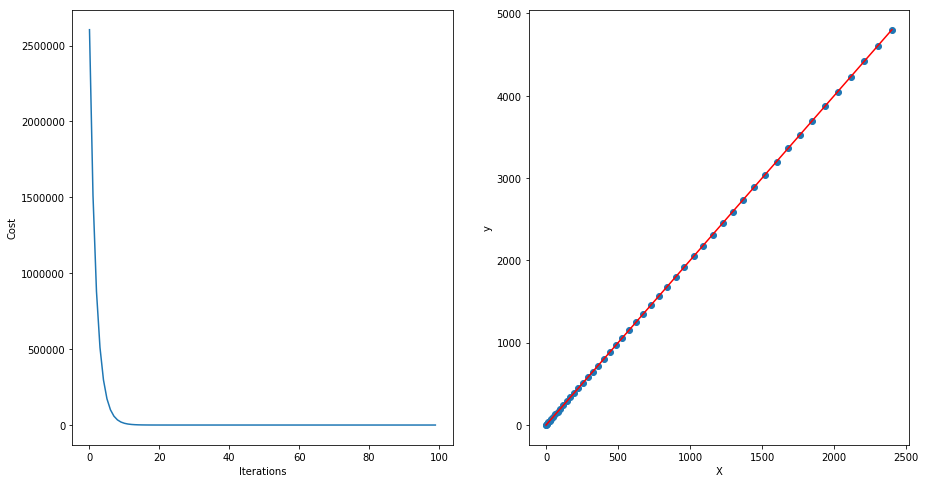

In [231]:
W = linear_regression(X, y, alpha=0.0000001, iterations=100)

In [232]:
X[:,1] = (X[:,1]-X[:,1].mean())/(X[:,1].max() - X[:,1].min())

In [233]:
X

array([[ 1.        , -0.33673469],
       [ 1.        , -0.3363182 ],
       [ 1.        , -0.33506872],
       [ 1.        , -0.33298626],
       [ 1.        , -0.3300708 ],
       [ 1.        , -0.32632237],
       [ 1.        , -0.32174094],
       [ 1.        , -0.31632653],
       [ 1.        , -0.31007913],
       [ 1.        , -0.30299875],
       [ 1.        , -0.29508538],
       [ 1.        , -0.28633903],
       [ 1.        , -0.27675968],
       [ 1.        , -0.26634736],
       [ 1.        , -0.25510204],
       [ 1.        , -0.24302374],
       [ 1.        , -0.23011245],
       [ 1.        , -0.21636818],
       [ 1.        , -0.20179092],
       [ 1.        , -0.18638067],
       [ 1.        , -0.17013744],
       [ 1.        , -0.15306122],
       [ 1.        , -0.13515202],
       [ 1.        , -0.11640983],
       [ 1.        , -0.09683465],
       [ 1.        , -0.07642649],
       [ 1.        , -0.05518534],
       [ 1.        , -0.0331112 ],
       [ 1.        ,

Initial Weights :
[[-0.58653806]
 [ 0.29072008]]
Final weights : 
[[ 1617.        ]
 [ 4801.99996452]]
Final cost :  1.21185848273e-10


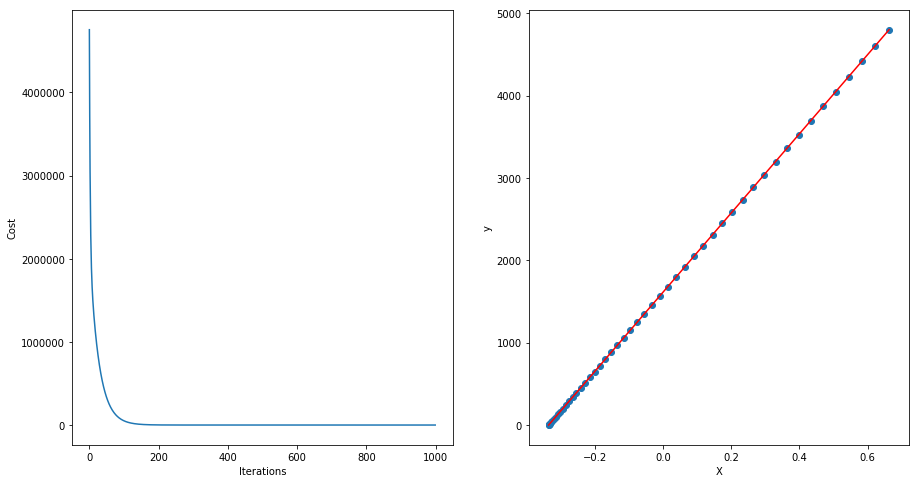

In [237]:
W = linear_regression(X, y, alpha=0.1, iterations=1000)

In [207]:
data = pd.read_csv('kc_house_data.csv', )

In [208]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [209]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [210]:
y = np.array(data['price'].astype(float))
X = np.array(data[['sqft_living' , 'sqft_lot']].astype(float))
n = X.shape[0]

In [211]:
X.shape

(21613, 2)

In [212]:
y.shape

(21613,)

In [213]:
X[:5,:]

array([[  1180.,   5650.],
       [  2570.,   7242.],
       [   770.,  10000.],
       [  1960.,   5000.],
       [  1680.,   8080.]])

In [214]:
y = y.reshape((-1,1))

In [215]:
for i in range(2):
    X[:,i] = (X[:,i] - X[:,i].mean())/(X[:,i].max() - X[:,i].min())

In [216]:
X = np.hstack((np.ones((n,1)), X))

In [217]:
X_train = X[:21000,:]
X_test = X[21000:,:]

y_train = y[:21000,:]
y_test = y[21000:,:]

n_train = X_train.shape[0]
n_test = X_test.shape[0]
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(21000, 3)
(21000, 1)
(613, 3)
(613, 1)


In [218]:
def rmse(y_hat, y):
    return np.sqrt( np.sum( (y_hat - y)**2 ) / y.shape[0] )

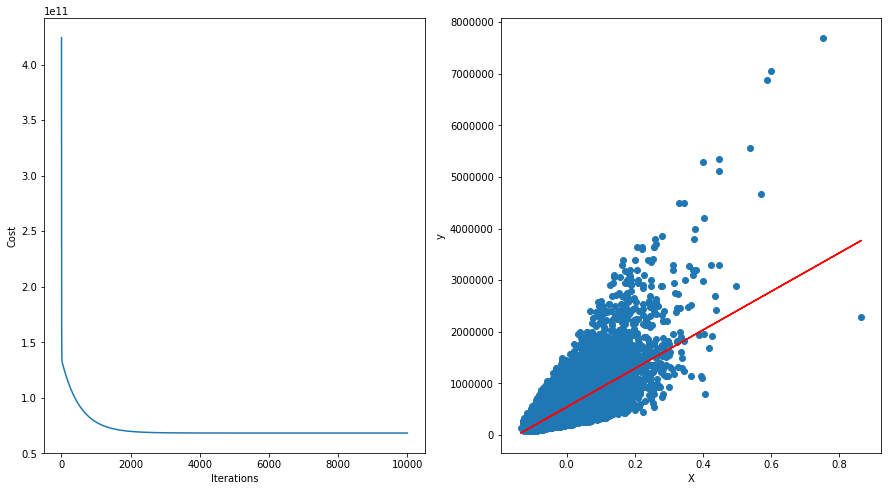

Training Error :  261220.808574
Test Error :  268942.143229


In [219]:
W = linear_regression(X_train[:,0:2], y_train, alpha=0.1, iterations=10000, verbose=False)
y_hat_train = np.dot(X_train[:,0:2],W)
print "Training Error : ", rmse(y_hat_train, y_train)
y_hat_test = np.dot(X_test[:,0:2],W)
print "Test Error : ", rmse(y_hat_test, y_test)

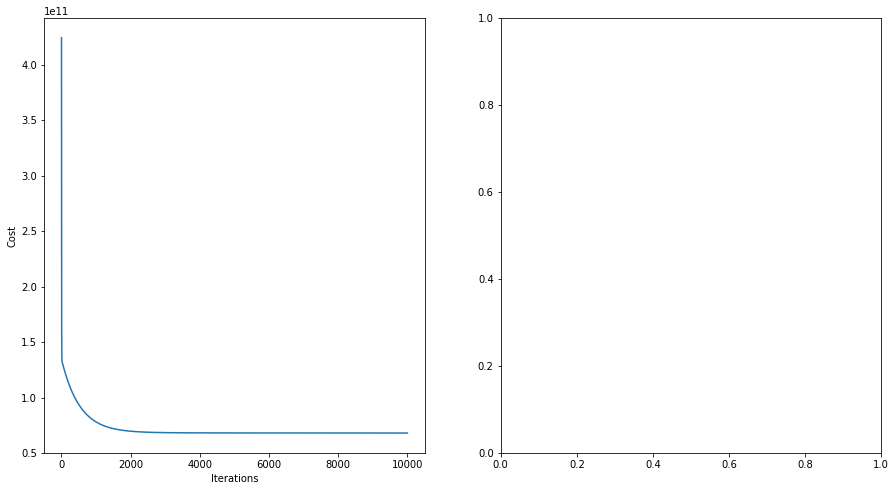

Training Error :  260992.524428
Test Error :  269121.425823


In [220]:
W = linear_regression(X_train, y_train, alpha=0.1, iterations=10000, verbose=False)
y_hat_train = np.dot(X_train,W)
print "Training Error : ", rmse(y_hat_train, y_train)
y_hat_test = np.dot(X_test,W)
print "Test Error : ", rmse(y_hat_test, y_test)

In [221]:
X = np.hstack((X , (X[:,1]**2).reshape((n,1))))
X_train = X[:21000,:]
X_test = X[21000:,:]

y_train = y[:21000,:]
y_test = y[21000:,:]

n_train = X_train.shape[0]
n_test = X_test.shape[0]
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(21000, 4)
(21000, 1)
(613, 4)
(613, 1)


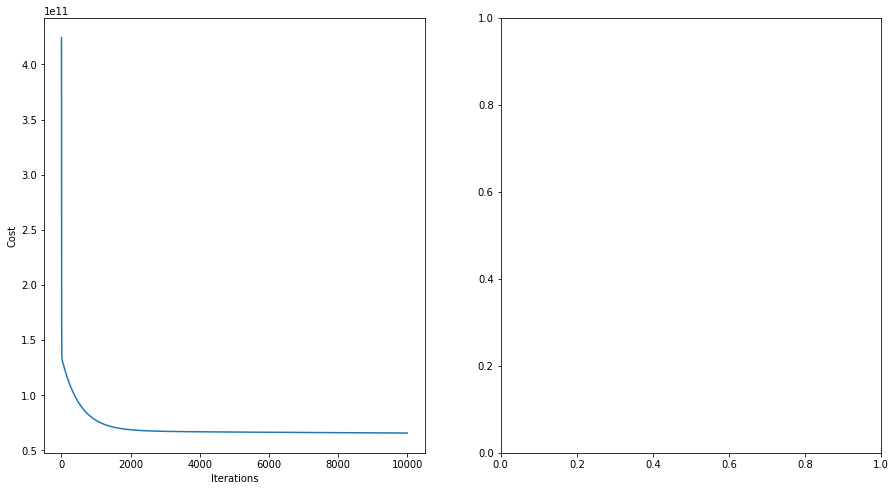

Training Error :  256330.703016
Test Error :  265506.518607


In [222]:
W = linear_regression(X_train, y_train, alpha=0.1, iterations=10000, verbose=False)
y_hat_train = np.dot(X_train,W)
print "Training Error : ", rmse(y_hat_train, y_train)
y_hat_test = np.dot(X_test,W)
print "Test Error : ", rmse(y_hat_test, y_test)

In [223]:
X = np.hstack((X , (X[:,1]*X[:,2]).reshape(n,1)))
X_train = X[:21000,:]
X_test = X[21000:,:]

y_train = y[:21000,:]
y_test = y[21000:,:]

n_train = X_train.shape[0]
n_test = X_test.shape[0]
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(21000, 5)
(21000, 1)
(613, 5)
(613, 1)


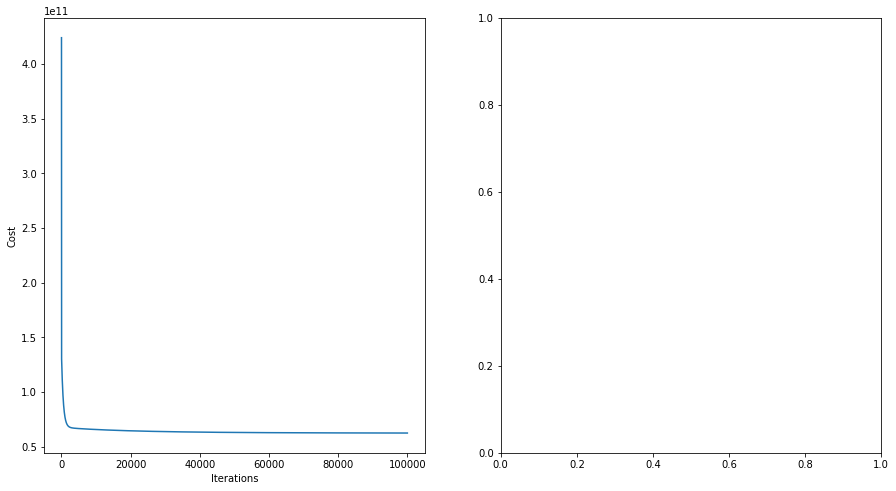

Training Error :  249981.308788
Test Error :  260231.830917


In [224]:
W = linear_regression(X_train, y_train, alpha=0.1, iterations=100000, verbose=False)
y_hat_train = np.dot(X_train,W)
print "Training Error : ", rmse(y_hat_train, y_train)
y_hat_test = np.dot(X_test,W)
print "Test Error : ", rmse(y_hat_test, y_test)